
CSYE7105 High Performance Parallel Machine Learning and AI

Instructor: Dr. Handan Liu

Example: K-fold CV in parallel


In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from sklearn import svm

In [2]:
test = np.loadtxt("optdigits.txt", delimiter = ",")
X = test[:, 0:64]
y = test[:, 64]

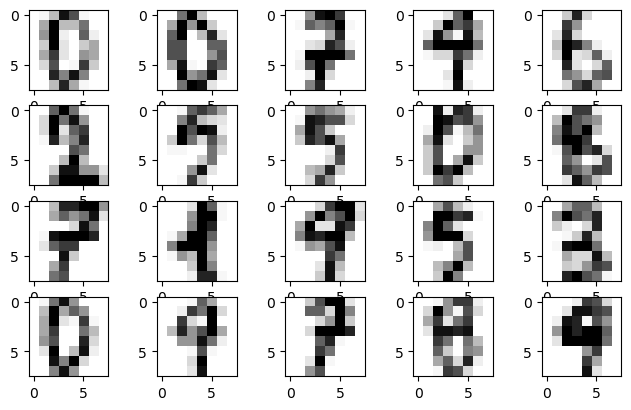

In [3]:
fig = plt.figure(figsize=(8, 6))
fig.tight_layout()
for i in range(0, 20):
    ax = fig.add_subplot(5, 5, i + 1)
    ax.imshow(X[i].reshape((8,8)), cmap = "Greys", vmin = 0, vmax = 16)
plt.show()

In [4]:
def cvkfold(X, y, tuning_params, partitions, k):
    n_tuning_params = tuning_params.shape[0] 

    partition = partitions[k]
    Train = np.delete(np.arange(0, X.shape[0]), partition)
    Test = partition   
    X_train = X[Train, :]  
    y_train = y[Train]

    X_test = X[Test, :]
    y_test = y[Test]

    accuracies = np.zeros(n_tuning_params)
    
    for i in range(0, n_tuning_params):
        svc = svm.SVC(C = tuning_params[i], kernel = "linear")
        accuracies[i] = svc.fit(X_train, y_train).score(X_test, y_test)
    
    return accuracies

In [5]:
K = 5
tuning_params = np.logspace(-6, -1, 10) 
partitions = np.array_split(np.random.permutation([i for i in range(0, X.shape[0])]), K)

In [6]:
t1 = time()
num = 2
pool = Pool(num)
args =[(X, y, tuning_params, partitions, k) for k in range(K)]
Accur = np.array(pool.starmap(cvkfold, args))
pool.close()
print('elapse time:', time()-t1)

elapse time: 8.267278909683228


In [7]:
t1 = time()
num = 4
pool = Pool(num)
args =[(X, y, tuning_params, partitions, k) for k in range(K)]
Accur = np.array(pool.starmap(cvkfold, args))
pool.close()
print('elapse time:', time()-t1)

elapse time: 5.499358177185059


In [8]:
t1 = time()
num = 8
pool = Pool(num)
args =[(X, y, tuning_params, partitions, k) for k in range(K)]
Accur = np.array(pool.starmap(cvkfold, args))
pool.close()
print('elapse time:', time()-t1)

elapse time: 2.971953868865967
